In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import bootcampviztools as bcv 
import matplotlib as plt
import spicy


In [2]:
data_chess = pd.read_csv('./data/Chess FIDE Rankings.csv')
df_chess = pd.DataFrame(data_chess)

In [3]:
df_chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         200 non-null    int64 
 1   name         200 non-null    object
 2   ELO          200 non-null    int64 
 3   title        200 non-null    object
 4   federation   200 non-null    object
 5   games        200 non-null    int64 
 6   birth_year   200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [4]:
df_chess.head(5)

,rank,name,ELO,title,federation,games,birth_year
0,1,Magnus Carlsen,2864,GM,Norway,3125,1990
1,2,Liren Ding,2806,GM,China,1630,1992
2,3,Alireza Firouzja,2793,GM,France,845,2003
3,4,Fabiano Caruana,2783,GM,United States,2622,1992
4,5,Levon Aronian,2775,GM,United States,3320,1982


### Categoricas
rank  
name  
title  
federation  
### Numericas
elo  
games  
birth year

In [5]:
df_chess.describe().T[['mean', 'std', 'min', '50%', 'max']]

,mean,std,min,50%,max
rank,100.500,57.879185,1.0,100.5,200.0
ELO,2662.385,47.208793,2608.0,2650.5,2864.0
games,1394.185,776.177129,277.0,1211.0,3913.0
birth_year,1989.395,9.057548,1965.0,1990.0,2006.0


title
GM    200
Name: count, dtype: int64
mean    200.0
50%     200.0
Name: count, dtype: float64


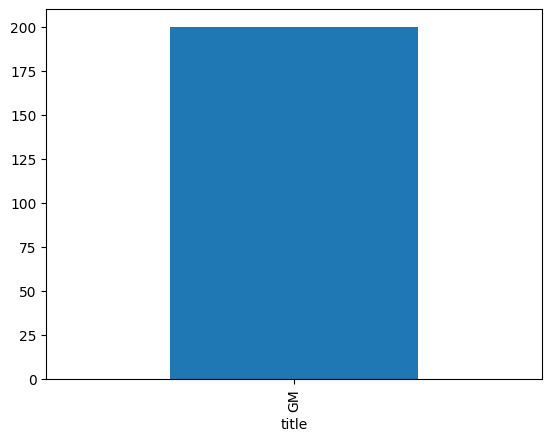

federation 
Russian Federation       22
United States            19
India                    17
Ukraine                  13
FIDE                     12
China                    12
Germany                   9
Armenia                   9
France                    7
Azerbaijan                7
Spain                     6
Netherlands               6
United Kingdom            5
Poland                    5
Hungary                   5
Israel                    4
Uzbekistan                4
Czech Republic            3
Norway                    3
Iran                      3
Romania                   2
Viet Nam                  2
Croatia                   2
Bulgaria                  2
Argentina                 2
Serbia                    2
Tajikistan                1
Denmark                   1
Uruguay                   1
Paraguay                  1
Italy                     1
Kazakhstan                1
Chile                     1
Turkey                    1
Canada                    1
Slovenia

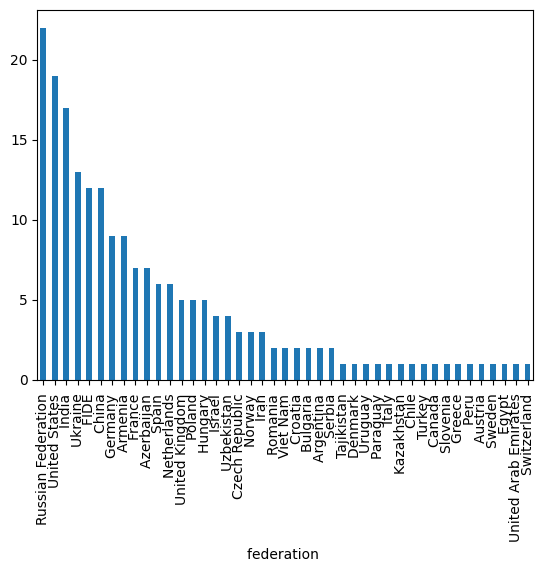

In [6]:
# Voy a representar las categoricas a ver como estan distribuidas
categoricas_chess = ['title',  'federation ']

for i in categoricas_chess:
    conteo = df_chess[i].value_counts()
    print(conteo)
    print(conteo.describe()[['mean', '50%']])
    conteo.plot(kind= 'bar')

    plt.pyplot.show()

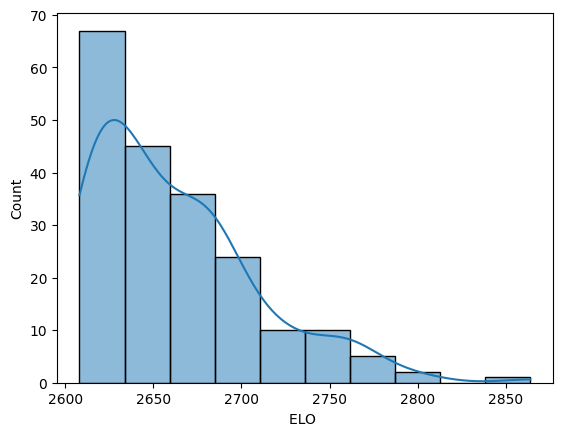

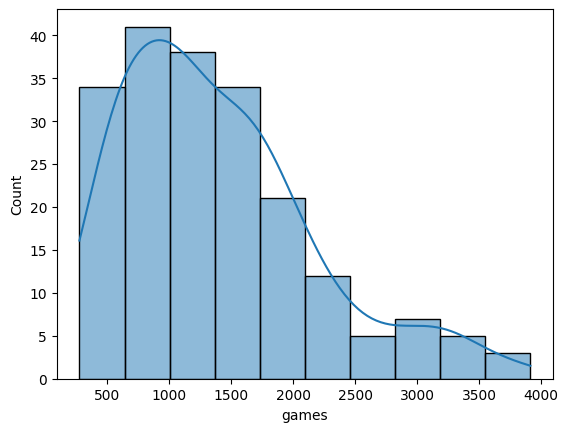

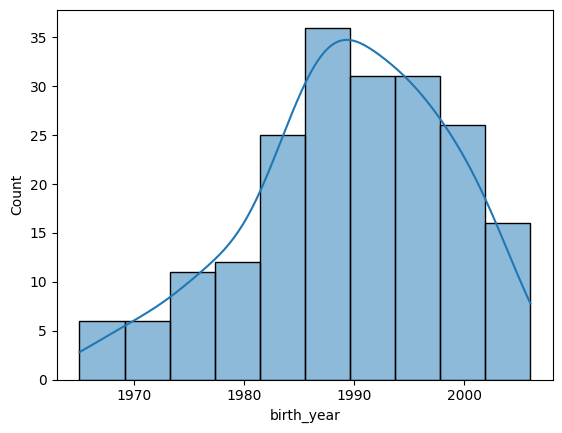

In [7]:
numericas_chess = ['ELO ', 'games', 'birth_year']
for i in numericas_chess:
        plt.pyplot.clf()
        sns.histplot(data= df_chess, x = i, bins= 10, kde= True)
        plt.pyplot.show()
        
        

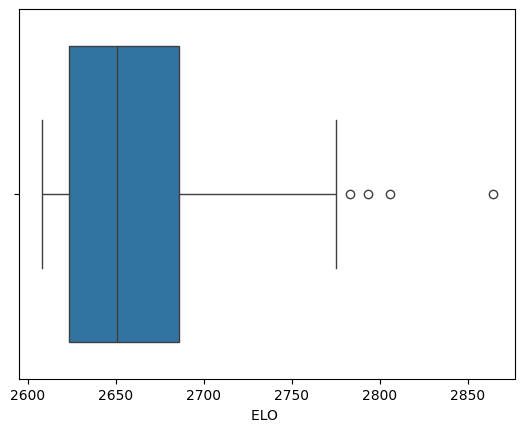

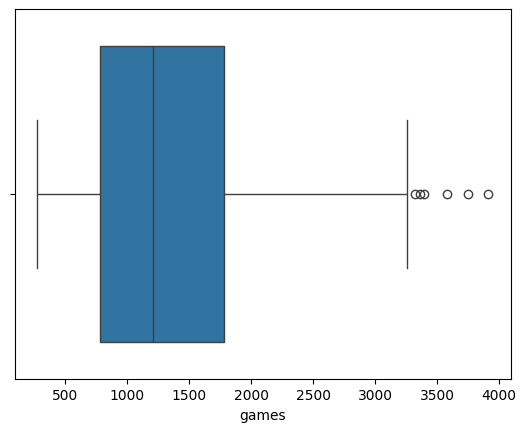

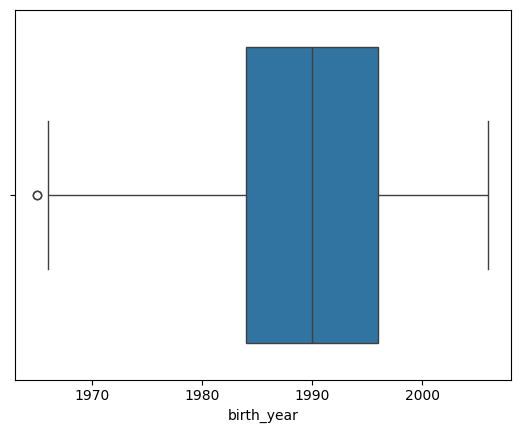

In [8]:
for i in numericas_chess:
    plt.pyplot.clf()
    sns.boxplot(df_chess, x = i)
    plt.pyplot.show()

## Multivariante

In [9]:
df_chess['federation_c'] = df_chess['federation '].factorize()[0]
df_chess_heat = df_chess[['ELO ', 'federation_c', 'games', 'birth_year']]
df_chess_heat

,ELO,federation_c,games,birth_year
0,2864,0,3125,1990
1,2806,1,1630,1992
2,2793,2,845,2003
3,2783,3,2622,1992
4,2775,3,3320,1982
...,...,...,...,...
195,2608,25,697,1970
196,2608,8,535,1999
197,2608,41,411,2004
198,2608,8,1811,1983


<Axes: >

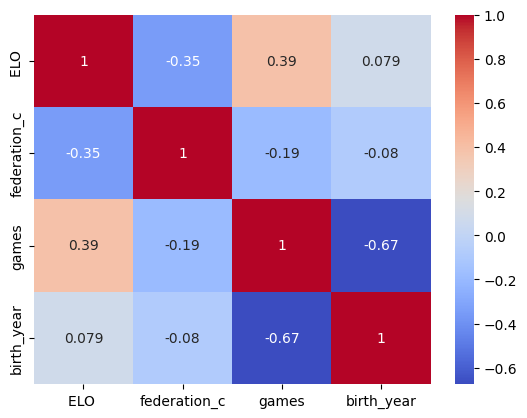

In [10]:
correlacion_matrix = df_chess_heat.corr()

sns.heatmap(correlacion_matrix, annot= True, cmap= 'coolwarm')

### bivariante entre federacion y elo


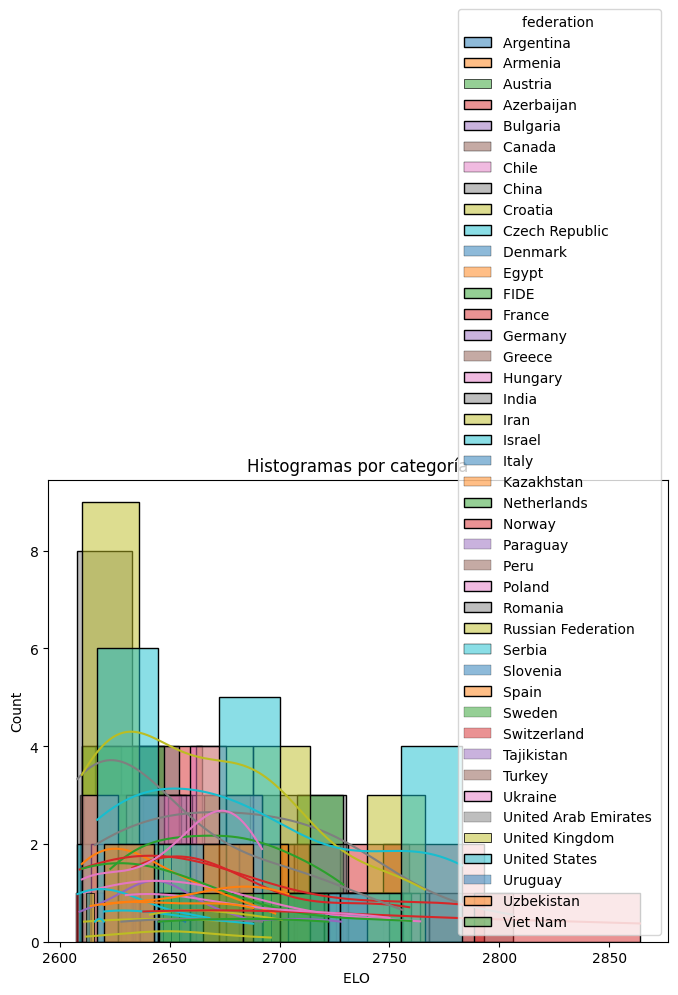

In [11]:
plt.pyplot.figure(figsize=(8, 6))
for cat, group in df_chess.groupby('federation '):
    sns.histplot(group['ELO '], label=cat, alpha=0.5, kde=True)
plt.pyplot.legend(title='federation ')
plt.pyplot.title('Histogramas por categoría')
plt.pyplot.show()

# este histograma sale horrible

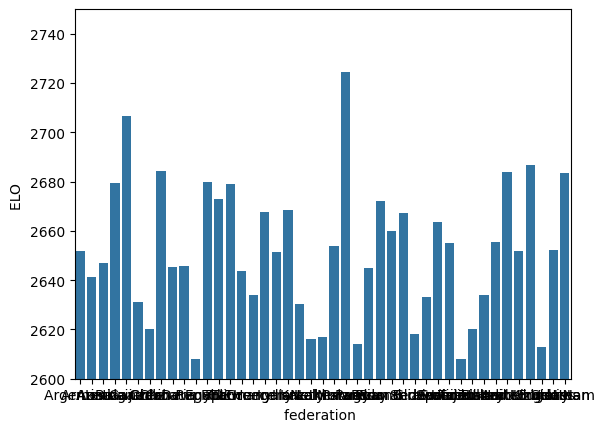

In [12]:
mean_by_feeration = df_chess.groupby('federation ')['ELO '].mean().reset_index()

plt.pyplot.figure()
sns.barplot(x= 'federation ', y= 'ELO ', data= mean_by_feeration)
plt.pyplot.ylim(2600, 2750)
plt.pyplot.show()

In [13]:
# para ver los resultados mas claros en un df ordenado
#mean_by_feeration.sort_values(by= 'ELO ', ascending= False)

### bivariante entre game sy elo

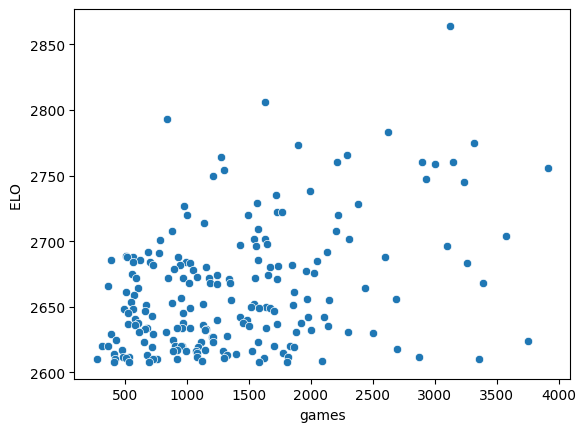

In [14]:
sns.scatterplot(y = df_chess['ELO '], x = df_chess['games'])
plt.pyplot.show()

### bivariante entre games y birth year

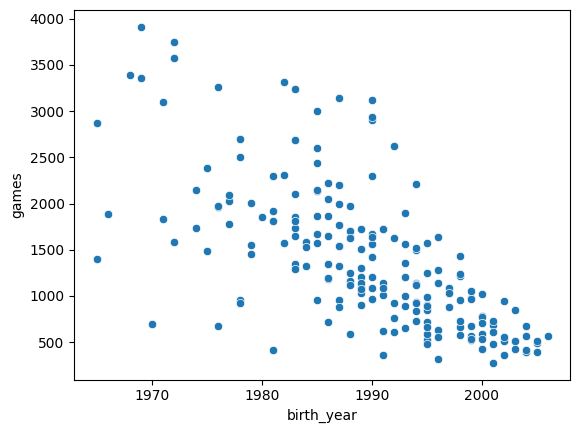

In [15]:
sns.scatterplot(x = df_chess['birth_year'], y = df_chess['games'])
plt.pyplot.show()

### bivariante entre elo y birth year

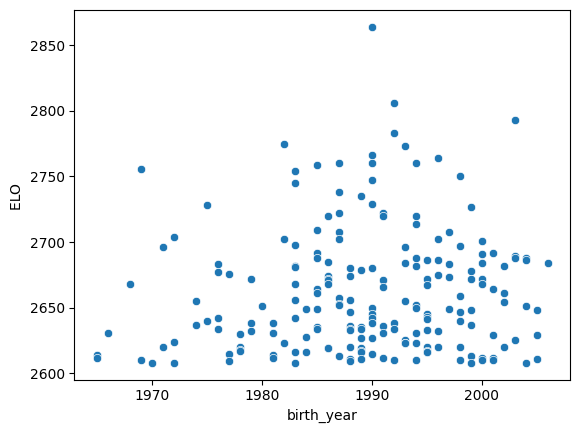

In [16]:
sns.scatterplot(x = df_chess['birth_year'], y = df_chess['ELO '])
plt.pyplot.show()